In [6]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw

from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize


def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):

    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)
    

def density_scatter_plot(x, y,ax=None, **kwargs):
    """
    :param x: data positions on the x axis
    :param y: data positions on the y axis
    :return: matplotlib.collections.PathCollection object
    """
    # Kernel Density Estimate (KDE)
    ax = ax or plt.gca()

    values = np.vstack((x, y))
    kernel = gaussian_kde(values)
    kde = kernel.evaluate(values)

    # create array with colors for each data point
    norm = Normalize(vmin=kde.min(), vmax=kde.max())
    colors = cm.ScalarMappable(norm=norm, cmap='viridis').to_rgba(kde)

    # override original color argument
    kwargs['color'] = colors

    return plt.scatter(x, y, **kwargs)


In [2]:
df = pd.read_parquet('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/charge_models_test.parquet')
df

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,resp_dipole,am1bcc_esp_rms,espaloma_esp_rms,resp_esp_rms,mbis_esp_rms,molecule,grid,qm_esp,riniker_esp_rms
0,"[-0.22269026300546416, 0.0986548857271199, -0....","[-0.0894, 0.1548, -0.7962, 0.1548, -0.0894, -0...","[-0.07576356260549455, 0.0697487351440248, -0....","[-0.30706286430358887, 0.01613098382949829, -0...","[-0.055, 0.0874, -0.8195, 0.0874, -0.055, 0.10...",0.482231,0.612847,0.657241,0.245546,0.616496,0.497217,1.766681,4.192248,1.061804,1.769024,[C:1]1([H:11])([H:12])[C:2]([H:13])([H:14])[N:...,"[[-4.6840821751273385, -1.1985072844843319, 1....","[0.0002998244321243959, -0.0002435208943376565...",0.983287
1,"[-0.307478181466797, -0.32475236546718506, 0.0...","[-0.1269, -0.1269, -0.111, -0.0814, 0.1528, -0...","[-0.17321058894906724, -0.17321058894906724, -...","[-0.3678119480609894, -0.37190431356430054, 0....","[-0.3026, -0.3026, 0.1671, -0.0841, 0.0157, -0...",0.463489,0.328383,0.411711,1.121593,0.320236,0.474776,1.711427,4.318221,1.336640,1.854834,[C:1]1([H:9])([H:10])[C:2]([H:11])([H:12])[C:3...,"[[-4.618226513262415, 0.6687491157891656, -0.0...","[0.003807534095750853, 0.005536206114819642, 0...",0.928624
2,"[0.18318003045342993, -0.2598634431943842, -0....","[0.1214, -0.0273, -0.3572, 0.1952, -0.3976, 0....","[0.10370072921117147, -0.2081667164961497, -0....","[0.07321783900260925, -0.32436901330947876, -0...","[-0.074, 0.0126, -0.2653, 0.0956, -0.3139, 0.0...",0.743610,0.811633,1.006174,1.447500,0.817276,0.717458,2.712812,4.618196,1.487021,1.810721,[C:1]1([H:8])([H:9])[C:2]([H:10])([H:11])[S:3]...,"[[-3.4603634180881917, -4.794984987767819, -3....","[-0.01648513102157345, -0.016546033230945945, ...",1.183654
3,"[-0.27024134000385275, -0.2514930826279807, 0....","[-0.1094, -0.0984, 0.1401, -0.4256, 0.1264, 0....","[-0.22874532377018647, -0.18081164097084718, 0...","[-0.31097567081451416, -0.3029680848121643, 0....","[-0.1146, -0.0616, 0.4422, -0.553, 0.1441, 0.0...",0.424558,0.453174,0.424885,0.729356,0.384860,0.437629,1.308036,3.308412,0.787228,1.472415,[C:1]1([H:8])([H:9])[C:2]([H:10])([H:11])[C:3]...,"[[-3.135893501910544, -4.689287925870755, 1.74...","[-0.012030632055308743, -0.012702403534801121,...",0.980107
4,"[-0.25576208790277083, -0.2525614470001997, 0....","[-0.11239999999999999, -0.11339999999999999, 0...","[-0.16070350436937242, -0.1910425963855925, 0....","[-0.2950514853000641, -0.3121240437030792, 0.1...","[-0.0219, -0.0166, 0.0911, 0.2138, -0.3633, 0....",1.098734,1.189061,1.062059,1.851543,0.995682,1.124177,2.254542,5.684812,1.109185,1.566957,[C:1]1([H:10])([H:11])[C:2]([H:12])([H:13])[C:...,"[[-4.5638697438848475, -2.2939683694256034, 1....","[0.00647364979596432, 0.007305318678223038, 0....",1.368641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34923,"[-0.4307936125045173, 0.35266299719448524, -0....","[-0.10315252631578949, 0.13044747368421053, -0...","[-0.16938045071928123, 0.23442702544362923, -0...","[-0.5688874125480652, 0.35258910059928894, -0....","[-0.3234, 0.422, -0.3234, 0.0835, -0.1508, -0....",0.869328,0.872096,1.217937,1.813061,0.668468,1.099153,2.691785,7.475896,1.678970,1.273094,[C:1]([C:2]([C:3]([H:13])([H:14])[H:15])([C:4]...,"[[-3.7874826050688455, -0.902746520613953, 2.4...","[-0.0055729953891621165, -0.002821495455125777...",1.554715
34924,"[-0.446016524842485, 0.4470529110725375, -0.40...","[-0.10454736842105264, 0.23015263157894736, -0...","[-0.16086909488627785, 0.28039979620983724, -0...","[-0.5875690579414368, 0.4356086552143097, -0.5...","[-0.3489, 0.6182, -0.3489, -0.2262, 0.0329, -0...",0.875990,0.837351,0.886616,0.316271,0.765047,1.067602,1.592437,5.912196,1.543108,1.421052,[C:1]([C:2]([C:3]([H:13])([H:14])[H:15])([C:4]...,"[[-3.731207475715633, -0.8517897910100047, 2.0...","[-0.00211648004266074, -0.004617378798517535, ...",1.000175
34925,"[-0.316128375134428, -0.30531925078170524, 0.5

In [9]:
len(df.iloc[0]['mbis_charges'])

17

In [3]:
def explode_charges(df, charge_columns, molecule_column='molecule'):
    rows = []
    for _, row in df.iterrows():
        charges_dict = {col: row[col] for col in charge_columns if row[col] is not None}
        n_charges = len(charges_dict[charge_columns[0]])  # Number of charges per molecule
        for i in range(n_charges):
            exploded_row = {col: charges_dict[col][i] for col in charge_columns}
            exploded_row[molecule_column] = row[molecule_column]
            exploded_row['element_index'] = i + 1  # Add index for the atom/element
            rows.append(exploded_row)
    return pd.DataFrame(rows)

# Define charge columns
charge_columns = ['mbis_charges', 'am1bcc_charges','riniker_monopoles', 'espaloma_charges','resp_charges']

# Explode the DataFrame
exploded_df = explode_charges(df, charge_columns)


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# Function to calculate density for coloring
def calculate_density(x, y):
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)
    return density

# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['am1bcc_charges', 'riniker_monopoles', 'espaloma_charges', 'resp_charges']

# Example DataFrame
# Replace this with your actual data
data = {
    'mbis_charges': np.concatenate(df['mbis_charges']),
    'am1bcc_charges': np.concatenate(df['am1bcc_charges']),
    'riniker_monopoles': np.concatenate(df['riniker_monopoles']),
    'espaloma_charges':  np.concatenate(df['espaloma_charges']),
    'resp_charges': np.concatenate(df['resp_charges'])
}
df = pd.DataFrame(data)

# Create subplots: one row for each comparison
fig = make_subplots(rows=len(compare_columns), cols=1, shared_xaxes=True, shared_yaxes=True)

for i, col in enumerate(compare_columns, start=1):
    x = df[col]
    y = df['mbis_charges']
    density = calculate_density(x, y)
    
    scatter = go.Scatter(
        x=x,
        y=y,
        mode='markers',
        marker=dict(
            size=5,
            color=density,  # Density-based coloring
            colorscale='Viridis',
            showscale=True
        ),
        name=f'{col} vs mbis_charges'
    )
    fig.add_trace(scatter, row=i, col=1)
    # Add an equality line
    equality_line = go.Scatter(
        x=[-1.5, 1.5],
        y=[-1.5, 1.5],
        mode='lines',
        line=dict(color='gray', dash='dash'),
        showlegend=False
    )
    fig.add_trace(equality_line, row=i, col=1)

# Update layout
fig.update_layout(
    height=400 * len(compare_columns),  # Adjust height based on number of rows
    width=800,
    title="Comparison of Partial Charges",
    xaxis_title="Predicted Charges",
    yaxis_title="MBIS Charges",
)

# Display the plot
fig.write_image('comparison_of_charges.png')  # Save the plot as PNG
fig.show()


In [13]:
data

{'mbis_charges': array([array([-0.22269026,  0.09865489, -0.6778336 ,  0.09865502, -0.22269038,
               -0.11169132, -0.49760882,  0.71771117, -0.28906402, -0.28906375,
                0.0979953 ,  0.11558471,  0.06939248,  0.06968945,  0.32905662,
                0.06939236,  0.06968943,  0.09799509,  0.1155848 ,  0.18066584,
                0.18066585])                                                   ,
        array([-0.30747818, -0.32475237,  0.06212794, -0.24488474,  0.10291763,
               -0.67952782,  0.10291793, -0.24488487,  0.13826928,  0.13826921,
                0.13977961,  0.13977957,  0.08983566,  0.10497514,  0.06315735,
                0.06762724,  0.32650237,  0.06315717,  0.06762717,  0.10497516,
                0.08983567])                                                   ,
        array([ 0.18318003, -0.25986344, -0.23324592,  0.20927146, -0.43504134,
                0.13056606, -0.66881527,  0.07737889,  0.05457898,  0.13401891,
                0.1423

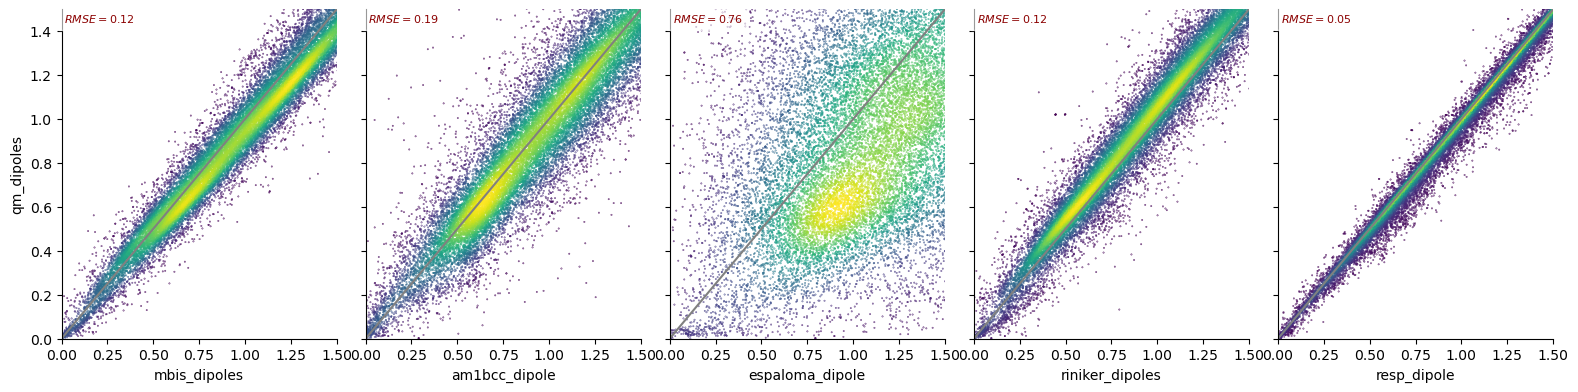

In [10]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['mbis_dipoles','am1bcc_dipole','espaloma_dipole','riniker_dipoles','resp_dipole']


# Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
grid = sb.PairGrid(df, x_vars=compare_columns, y_vars=['qm_dipoles'], height=4, aspect=0.8,
)


# Map the plots to the grid
grid = grid.map(density_scatter_plot, s=0.1)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')

# Set axis limits
grid.set(xlim=(0,1.5), ylim=(0,1.5))

# Display the plot
plt.savefig('comparison_of_dipoles.png', dpi=1000)

plt.show()

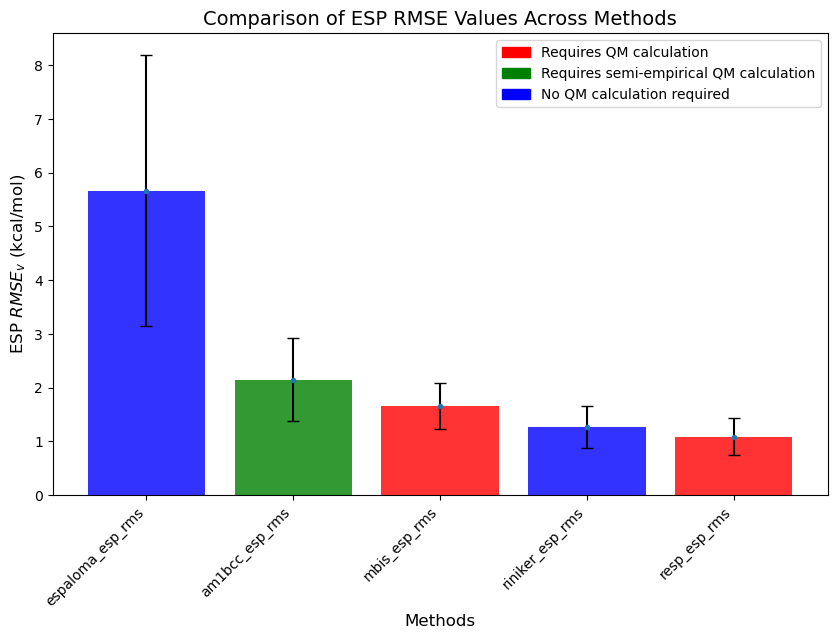

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the columns to compare
compare_columns = ['am1bcc_esp_rms', 'espaloma_esp_rms', 'riniker_esp_rms', 'mbis_esp_rms', 'resp_esp_rms']

# Assign colors based on the requirements for each method
color_map = {
    'am1bcc_esp_rms': 'green',   # Semi-empirical QM calculation
    'espaloma_esp_rms': 'blue',  # No QM calculation required
    'riniker_esp_rms': 'blue',   # No QM calculation required
    'mbis_esp_rms': 'red',       # QM calculation required
    'resp_esp_rms': 'red'        # QM calculation required
}

# Calculate mean and standard deviation for the columns
mean_values = df[compare_columns].mean()
std_dev_values = df[compare_columns].std()

# Create a DataFrame for easy sorting and plotting
mean_values_df = pd.DataFrame({
    'mean': mean_values,
    'std_dev': std_dev_values,
    'color': [color_map[col] for col in compare_columns]  # Map colors to methods
}).sort_values(by='mean', ascending=False)

# Plot the bar chart with error bars
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(
    x=mean_values_df.index,
    height=mean_values_df['mean'],
    color=mean_values_df['color'],  # Use the assigned colors
    alpha=0.8,
    label='Mean ESP RMSE'
)
plt.errorbar(
    x=mean_values_df.index,
    y=mean_values_df['mean'],
    yerr=mean_values_df['std_dev'],
    fmt=".", ecolor='black', capsize=4
)

# Add labels and formatting
plt.xticks(rotation=45, ha='right')
plt.ylabel('ESP $RMSE_{v}$ (kcal/mol)', fontsize=12)
plt.xlabel('Methods', fontsize=12)
plt.title('Comparison of ESP RMSE Values Across Methods', fontsize=14)

# Add a legend for context
red_patch = mpatches.Patch(color='red', label='Requires QM calculation')
green_patch = mpatches.Patch(color='green', label='Requires semi-empirical QM calculation')
blue_patch = mpatches.Patch(color='blue', label='No QM calculation required')

plt.legend(handles=[red_patch, green_patch, blue_patch], loc='upper right')

# Save the figure or display it
plt.savefig('esp_comparison.png', dpi=800, bbox_inches='tight')
plt.show()


In [ ]:
# Define the columns you want to compare against QM_HF_Dipoles
compare_columns = ['am1bcc_charges','espaloma_charges','riniker_monopoles','resp_charges']


# Initialize a PairGrid with col_wrap set to 3 for 3 columns per row
grid = sb.PairGrid(exploded_df, x_vars=compare_columns, y_vars=['qm_dipoles'], height=4, aspect=0.8)

# Map the plots to the grid
grid = grid.map(kde)
grid = grid.map_offdiag(equalityline, color='gray', ls='-')
grid = grid.map_offdiag(m)
grid.map_diag(sb.kdeplot, color='gray')

# Set axis limits
grid.set(xlim=(-1,1.5), ylim=(-1,1.5))

# Display the plot
plt.savefig('comparison_of_charges.png', dpi=1000)
plt.show()

17

In [13]:
df.to_csv('./sanity_check.csv')

In [14]:
df.iloc[0]

mbis_charges         [-0.44171691769759425, 0.19215883543444148, -0...
am1bcc_charges       [-0.15928235294117646, 0.13051764705882352, -0...
espaloma_charges     [-0.2646322256940253, 0.09048017793718506, -0....
riniker_monopoles    [-0.4982544779777527, 0.08591508120298386, -0....
resp_charges         [-0.2238, 0.1144, -0.3794, 0.1839, 0.4749, -0....
qm_dipoles                                                    0.372726
mbis_dipoles                                                  0.196034
am1bcc_dipole                                                 0.099876
espaloma_dipole                                               0.568253
riniker_dipoles                                               0.042476
resp_dipole                                                   0.179598
molecule             [C:1]1([H:10])([H:11])[C:2]([H:12])([H:13])[O:...
grid                 [[-4.959543008824821, -1.4344262395541767, 0.2...
Name: 0, dtype: object

In [15]:
df.iloc[2]

mbis_charges         [-0.273265076200354, 0.19154401299583018, -0.4...
am1bcc_charges       [-0.1094, 0.1304, -0.4296, 0.1141, -0.00559999...
espaloma_charges     [-0.2049732649077972, 0.10700781705478828, -0....
riniker_monopoles    [-0.31433048844337463, 0.07334760576486588, -0...
resp_charges         [-0.049, 0.1191, -0.4819, 0.4558, -0.3094, -0....
qm_dipoles                                                    1.245573
mbis_dipoles                                                  0.695169
am1bcc_dipole                                                 0.780104
espaloma_dipole                                               0.978258
riniker_dipoles                                                0.13114
resp_dipole                                                   0.653697
molecule             [C:1]1([H:9])([H:10])[C:2]([H:11])([H:12])[O:3...
grid                 [[-5.238149148667286, 0.1674437813895311, 0.15...
Name: 2, dtype: object

/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


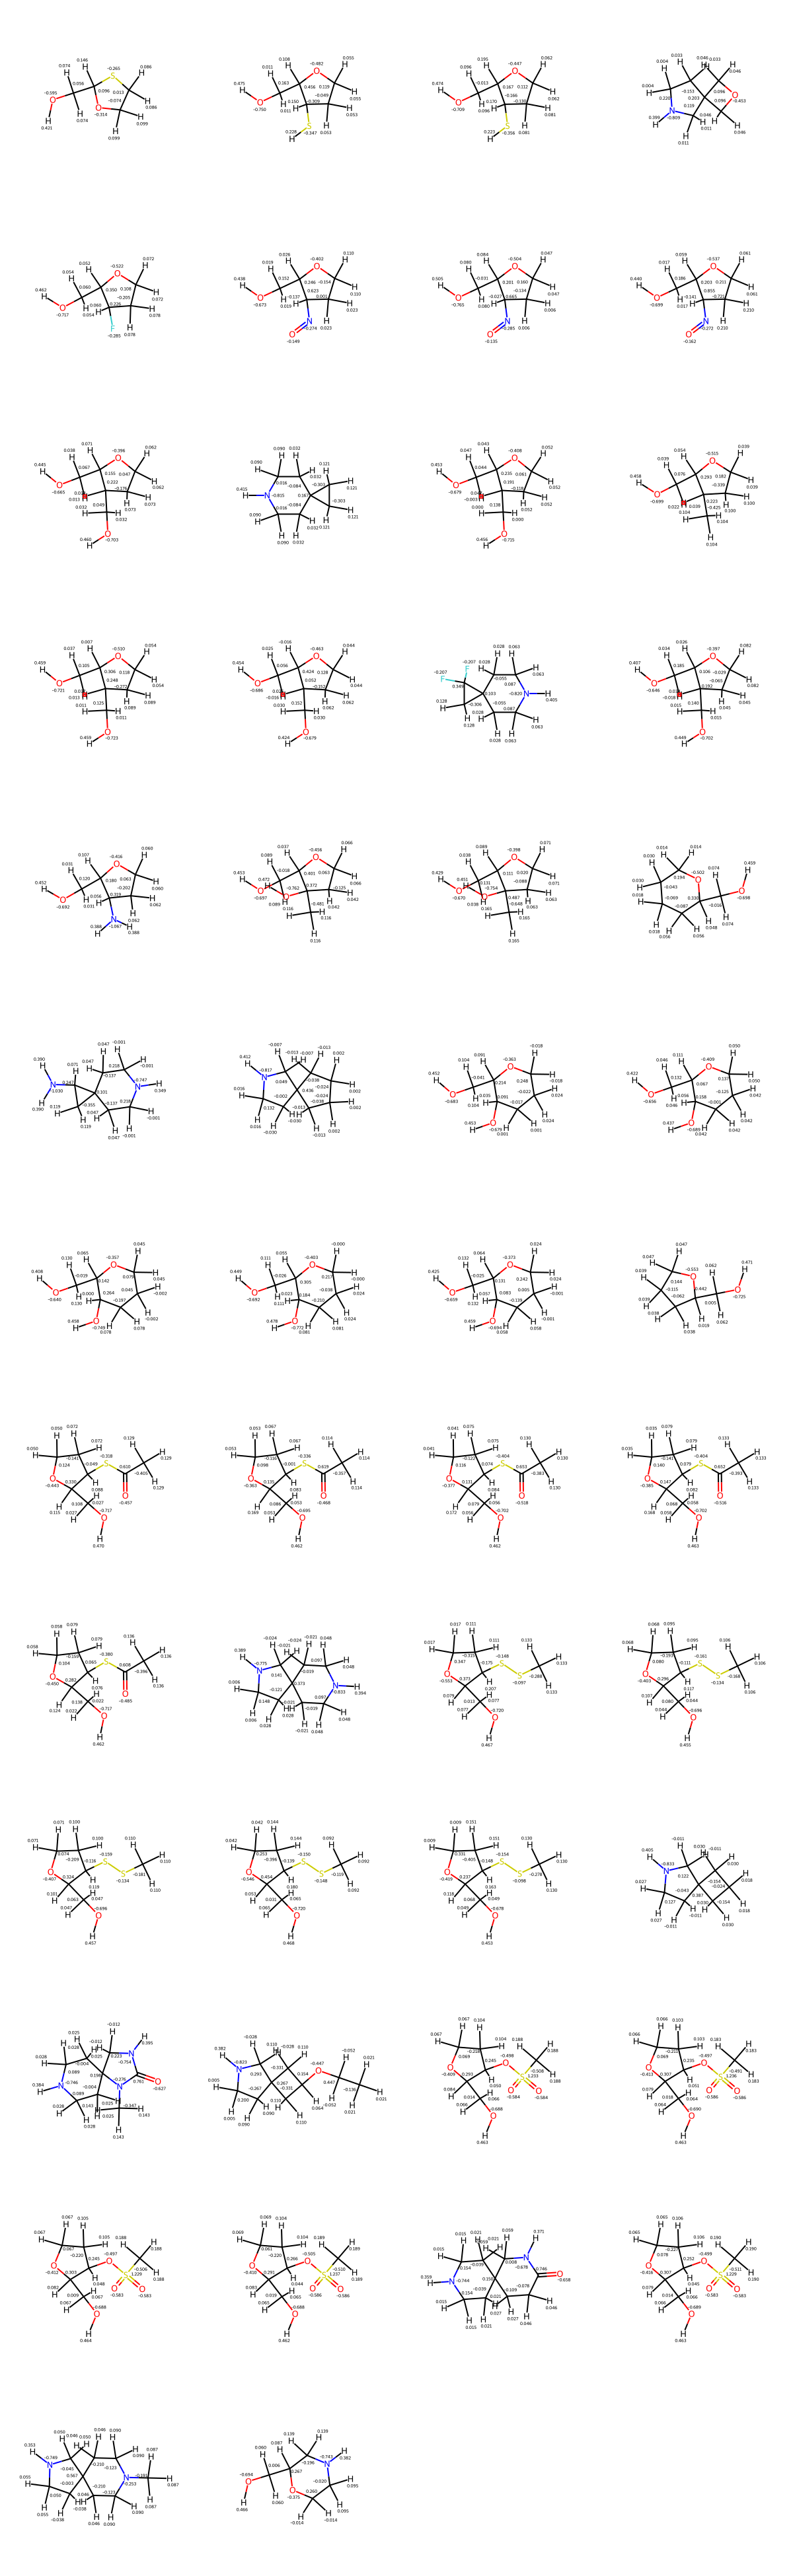

In [31]:
draw_mols  = list(range(1,80))
images = []
for mol in draw_mols:
    openff_molecule = Molecule.from_mapped_smiles(df.iloc[mol]['molecule'], allow_undefined_stereo=True)
    rdkit_mol = openff_molecule.to_rdkit()
    resp_charges =  df.iloc[mol]['resp_charges']
    for i, atom in enumerate(rdkit_mol.GetAtoms()):
        lbl = '%.3f' % (resp_charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(rdkit_mol)

img = Draw.MolsToGridImage(images, molsPerRow=4, subImgSize=(300, 300))
img

/scratch/ipykernel_13008/2251617336.py:1: AtomMappingWarning: Warning! Fully mapped SMILES pattern passed to `from_smiles`. The atom map is stored as a property in `Molecule._properties`, but these indices are NOT used to determine atom ordering. To use these indices for atom ordering, use `Molecule.from_mapped_smiles`.
  openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)


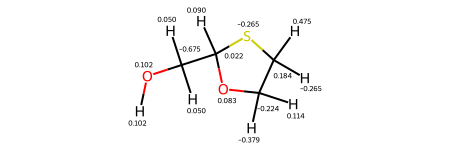

In [17]:


openff_molecule = Molecule.from_smiles(df.iloc[1]['molecule'], allow_undefined_stereo=True)
rdkit_mol = openff_molecule.to_rdkit()
resp_charges =  df.iloc[0]['resp_charges']
for i, atom in enumerate(rdkit_mol.GetAtoms()):
    lbl = '%.3f' % (resp_charges[i])
    atom.SetProp('atomNote', lbl)
rdkit_mol

In [6]:
from chargecraft.storage.storage import MoleculePropRecord, MoleculePropStore
from MultipoleNet import load_model, build_graph_batched, D_Q
riniker_model = load_model()


2024-11-20 14:32:42.788864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [7]:
prop_store = MoleculePropStore('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/ESP_rebuilt.db')
prop_store.list()

['OCC1OCCS1',
 'OCC1OCCC1F',
 'OCC1OCCC1S',
 'O=NC1CCOC1CO',
 'OCC1OCCC1(F)F',
 'C1CC2(CN1)COC2',
 'O=[N+]([O-])C1CCOC1CO',
 'NC1CCOC1CO',
 '[N-]=[N+]=NC1CCOC1CO',
 'CC1CCOC1CO',
 'OCC1CCOC1CO',
 'C1CC2(CCN1)CC2',
 'CC1(O)CCOC1CO',
 'FC1(F)CC12CCNCC2',
 '[NH3+]C1(O)CCOC1CO',
 'CC(=O)SC1CCOC1CO',
 'NC1CC12CCNCC2',
 'C1CCC2(C1)CCNC2',
 'C[NH+](C)C1CCOC1CO',
 'CP(=O)([O-])OC1CCOC1CO',
 'OCC1CCCCO1',
 'OCC1OCCCC1O',
 'OCC1CCCO1',
 '[NH3+]CCSSC1CCOC1CO',
 'CSSC1CCOC1CO',
 '[N-]=[N+]=NCC1CCOC1CO',
 'C1CC2(CC[NH2+]CC2)CN1',
 'C1CC2(CCN1)CCNC2',
 'C1CC2(CCN1)C1C[NH2+]CC12',
 'C1CC2(C1)CCNC2',
 'CN1C(=O)NCC12CCNCC2',
 'O=C1CCC2(CCNCC2)CN1',
 'CCOC1CC2(CCNC2)C1',
 '[NH3+]C1CCOC1CO',
 'CS(=O)(=O)OC1CCOC1CO',
 'CN1CCC2(CCNC2)CC1',
 'CN1CCOCC12CCNCC2',
 'CC1CC2(CCNCC2)CN1',
 'C[NH+]1CCOCC12CCNCC2',
 'C1CC2(CCNC2)CN1',
 'C=C1CCOC1CO',
 'OCC1CNCCO1',
 'C1CC2(CN1)CNC2',
 'OCC1OCCC(O)C1O',
 'C1CC2(CCN1)COC2',
 'N#CSC1CCOC1CO',
 'OCC1OCCC1O',
 'NC1(O)CCOC1CO',
 'C[NH+]1CC2(CCNC2)C1',
 'NCC1CC12CCNCC2',


In [8]:
molecule = prop_store.retrieve(smiles='OCC1OCCS1')

In [21]:
mapped_smiles = molecule[0].tagged_smiles
conformer_quantity = molecule[0].conformer_quantity
openff_mol = Molecule.from_mapped_smiles(mapped_smiles=mapped_smiles, allow_undefined_stereo=True)
openff_mol.add_conformer(conformer_quantity)
rdkit_conformer = openff_mol.to_rdkit()
elements = [a.GetSymbol() for a in rdkit_conformer.GetAtoms()]
coordinates = rdkit_conformer.GetConformer(0).GetPositions().astype(np.float32)

In [22]:
from espaloma_charge.openff_wrapper import EspalomaChargeToolkitWrapper

toolkit_wrapper = EspalomaChargeToolkitWrapper()

openff_mol.assign_partial_charges('espaloma-am1bcc', toolkit_registry=toolkit_wrapper)

/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/espaloma_charge/openff_wrapper.py:112: IncorrectNumConformersWarning: Molecule 'Molecule with name '' and SMILES '[H][O][C]([H])([H])[C]1([H])[O][C]([H])([H])[C]([H])([H])[S]1'' has 1 conformers, but charge method 'espaloma-am1bcc' expects exactly 0.
  self._check_n_conformers(
/mnt/nfs/home/nca121/mambaforge/envs/charge_model_env/lib/python3.11/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [23]:
openff_mol.partial_charges

Magnitude,[0.10370072921117147 -0.2081667164961497 -0.2932848314444224 0.0993407612045606 -0.377932874361674 0.18753446837266285 -0.6843801120917002 0.11059750070174536 0.11059750070174536 0.14053039451440175 0.14053039451440175 0.11685428967078527 0.08291831811269125 0.08291831811269125 0.38824185927708943]
Units,elementary_charge


In [24]:
molecule[0].mbis_charges_quantity

Magnitude,[[0.18318003045342993] [-0.2598634431943842] [-0.2332459155121245] [0.20927145531226463] [-0.43504133705820264] [0.13056605529786205] [-0.6688152668970049] [0.07737889180214504] [0.05457897684401664] [0.13401891491973164] [0.1423913543310807] [0.08841998642261444] [0.06529236728358229] [0.05497735657839933] [0.4569253980177039]]
Units,elementary_charge


In [9]:
molecule[0].esp_quantity

Magnitude,[[-0.01648513102157345] [-0.016546033230945945] [-0.02072616199469479] ... [0.01057195132719535] [0.007424593137120183] [0.00958607969085623]]
Units,hartree/elementary_charge


In [25]:
test_mol = prop_store.retrieve(smiles='[H][O][C]([H])([H])[C]1([H])[O][C]([H])([H])[C]([H])([H])[C]1([F])[F]')

In [26]:
test_mol[0].mbis_charges_quantity

Magnitude,[[-0.44171691769759425] [0.19215883543444148] [-0.430959238273838] [0.03781578130692773] [0.6978987768156796] [-0.30650265033868407] [-0.3107830714583748] [0.15108314303037665] [-0.6811987500288164] [0.15312256372432925] [0.15044177661520136] [0.07560967345827511] [0.04216704369202228] [0.09957404226914512] [0.06347353375309955] [0.053515296114191986] [0.4542960673386356]]
Units,elementary_charge


In [27]:
test_mol[0].conformer_quantity

Magnitude,[[-1.2547183367504817 0.6822987538777442 -0.679712352633502] [-1.8584591090954932 -0.3010141536322885 0.3355887986820094] [-0.8930008576440169 -0.41681652686970194 1.349742201669475] [0.35976165601028 -0.44634367330270847 0.7290831364652852] [0.23729215263382686 0.5958956408167781 -0.38179174780906977] [0.7195565866835817 1.792058862856065 0.01817445372242227] [0.970780213120398 0.24513640572788986 -1.4536694043688903] [1.4663905652221885 -0.18563376746993837 1.7253457776330943] [1.6313506808380474 -1.3432699410383506 2.4945936707851035] [-1.590600632988975 1.69524064268325 -0.5040182371349595] [-1.4585514451470714 0.41770197263784703 -1.7084425716161988] [-2.777193690460835 0.04851399300960859 0.7820652637140221] [-2.039797989653381 -1.2718649325337603 -0.11840522660114258] [0.5256388780668123 -1.4125088261313705 0.258249348221053] [1.1950364291287923 0.6671281110917531 2.3371288053091726] [2.3778050223537797 0.055987594509838125 1.183890612957039] [2.2221856888597364 -1.1661256683110468 3.212441586588853]]
Units,angstrom


In [28]:
test_off = Molecule.from_mapped_smiles(mapped_smiles=test_mol[0].tagged_smiles, allow_undefined_stereo=True)
test_off.add_conformer(test_mol[0].conformer_quantity.to(unit.bohr))

1

In [29]:
test_off.assign_partial_charges('am1bcc')
test_off.partial_charges

Magnitude,[-0.15928235294117646 0.13051764705882352 -0.4214823529411764 0.05421764705882354 0.39171764705882356 -0.23168235294117648 -0.23168235294117648 0.13451764705882352 -0.5896823529411764 0.08581764705882353 0.08581764705882353 0.05981764705882354 0.05981764705882354 0.09081764705882353 0.06331764705882353 0.06331764705882353 0.41411764705882353]
Units,elementary_charge


In [2]:
from ChargeAPI.API_infrastructure.esp_request.module_version_esp import handle_esp_request
molblock = "\n     RDKit          3D\n\n 17 17  0  0  0  0  0  0  0  0999 V2000\n   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0\n    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.7772    0.0485    0.7821 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0398   -1.2719   -0.1184 H   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5256   -1.4125    0.2582 H   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1950    0.6671    2.3371 H   0  0  0  0  0  0  0  0  0  0  0  0\n    2.3778    0.0560    1.1839 H   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2222   -1.1661    3.2124 H   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\n  1  5  1  0\n  1 10  1  0\n  1 11  1  0\n  2  3  1  0\n  2 12  1  0\n  2 13  1  0\n  3  4  1  0\n  4  5  1  0\n  4  8  1  0\n  4 14  1  0\n  5  6  1  0\n  5  7  1  0\n  8  9  1  0\n  8 15  1  0\n  8 16  1  0\n  9 17  1  0\nM  END\n"
result = handle_esp_request(charge_model='RIN',
                   conformer_mol=molblock)
result

grid is

total grid command:
conda run -n riniker python /mnt/nfs/home/nca121/ChargeAPI_test/ChargeAPI/ChargeAPI/esp_models/riniker_model.py                 --conformer '
     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  

{'esp_result': '[0.01217331464208723, -0.00010272395190474523, 0.0100705821050963, 0.01310537506679281, 0.01571480821942189, 0.0073920179117542735, 0.0043291605210341476, -0.006863911642694535, 0.0017230035780839799, -0.0003380744616278165, -0.014517148112841466, 0.015232874226689347, 0.006478526776316914, -0.005073815530142122, 0.017667564305937883, 0.013857200398152086, 0.012838762955913212, 0.015487776496165324, 0.018602506643552, -0.03569856615400988, -0.02244141148953538, -0.02706344064247599, -0.0292622293600274, -0.037421310361843575, -0.01951555096982688, -0.014329323995224293, -0.0270822607614707, -0.03607017135320963, -0.02173254952561824, -0.018437986368338752, -0.0022178471601935375, -0.009561948749866827, -0.010935039951214911, -0.01281840052098311, -0.014415750301237113, -0.012490564456538983, -0.006832402862534592, -0.01629970407148981, -0.017128730239976284, -0.015154896038575918, -0.008792173851160911, -0.011257383814923678, -0.01915258055774006, -0.017429974137167938,

In [9]:
import os
import json

mol_grid = None

dict_item = {}
dict_item['abc'] = [molblock, mol_grid]
json_file = os.path.join('molblocks.json')
json.dump(dict_item, open(json_file, "w"))
result = handle_esp_request(
    charge_model='RIN',
    conformer_mol='/mnt/storage/nobackup/nca121/molblocks.json',
    broken_up=True,
    batched= True
)
result


grid is

total grid command:
conda run -n riniker python /mnt/nfs/home/nca121/ChargeAPI_test/ChargeAPI/ChargeAPI/esp_models/riniker_model.py                 --conformer '/mnt/storage/nobackup/nca121/molblocks.json'                 --batched                  --broken_up                                  --not_batched_grid
errors are:
ERROR:root:molbock is 
     RDKit          3D

 17 17  0  0  0  0  0  0  0  0999 V2000
   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6314   -1.343

{'file_path': '/mnt/storage/nobackup/nca121/molblock_esp.json',
 'error': 'ERROR:root:molbock is \n     RDKit          3D\n\n 17 17  0  0  0  0  0  0  0  0999 V2000\n   -1.2547    0.6823   -0.6797 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8585   -0.3010    0.3356 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.8930   -0.4168    1.3497 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.3598   -0.4463    0.7291 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2373    0.5959   -0.3818 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7196    1.7921    0.0182 F   0  0  0  0  0  0  0  0  0  0  0  0\n    0.9708    0.2451   -1.4537 F   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4664   -0.1856    1.7253 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6314   -1.3433    2.4946 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5906    1.6952   -0.5040 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4586    0.4177   -1.7084 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.7772    0.0485    0.7821 H   0  0  0  0  0  0  